# Twitter Airline Sentiment Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-whitegrid')

from wordcloud import WordCloud, STOPWORDS


In [2]:
df = pd.read_csv('https://github.com/mkhj/Data-science/raw/master/Natural%20Language%20Processing%20(NLP)/Data/Airline-Sentiment-2-w-AA.csv', sep= ',', header = [0])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   _unit_id                      14640 non-null  int64  
 1   _golden                       14640 non-null  bool   
 2   _unit_state                   14640 non-null  object 
 3   _trusted_judgments            14640 non-null  int64  
 4   _last_judgment_at             14584 non-null  object 
 5   airline_sentiment             14640 non-null  object 
 6   airline_sentiment:confidence  14640 non-null  float64
 7   negativereason                9178 non-null   object 
 8   negativereason:confidence     10522 non-null  float64
 9   airline                       14640 non-null  object 
 10  airline_sentiment_gold        40 non-null     object 
 11  name                          14640 non-null  object 
 12  negativereason_gold           32 non-null     object 
 13  r

In [4]:
# Unique values of sentiment
df['airline_sentiment'].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

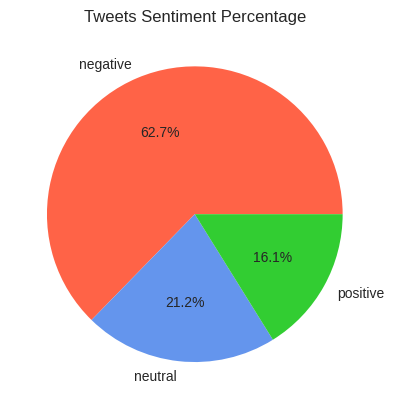

In [5]:
# https://matplotlib.org/2.0.2/examples/color/named_colors.html

plt.pie(df['airline_sentiment'].value_counts(), labels=['negative', 'neutral', 'positive'], colors = ['tomato', 'cornflowerblue', 'limegreen'], autopct='%1.1f%%')
plt.title('Tweets Sentiment Percentage')
plt.show()

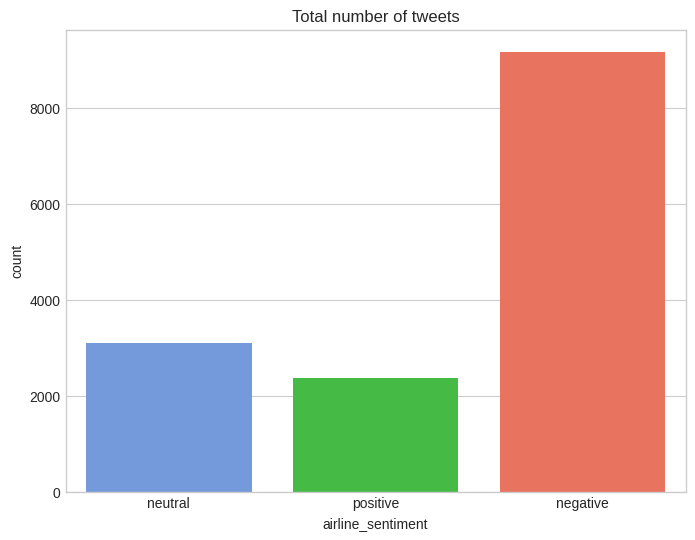

In [6]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x = "airline_sentiment", data = df, palette = ['cornflowerblue', 'limegreen', 'tomato']).set_title("Total number of tweets")
plt.show()

Total number of tweets for each airline: 
 
  airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline_sentiment, dtype: int64


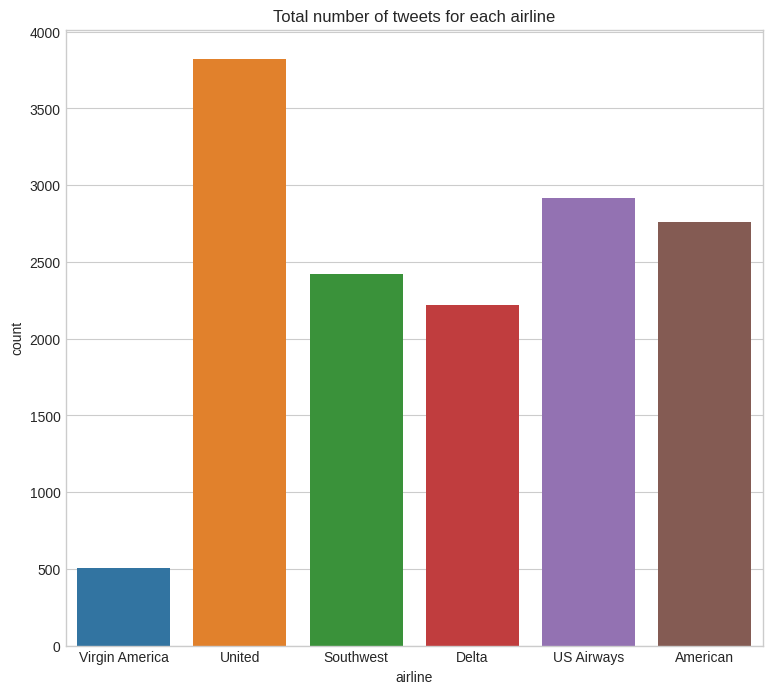

In [7]:
print("Total number of tweets for each airline: \n \n ",df.groupby('airline')['airline_sentiment'].count().sort_values(ascending=False))

plt.figure(figsize=(9,8))
sns.countplot(x="airline", data=df).set_title("Total number of tweets for each airline")
plt.show()

In [8]:
# Unique values of airline
df['airline'].unique()

array(['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways',
       'American'], dtype=object)

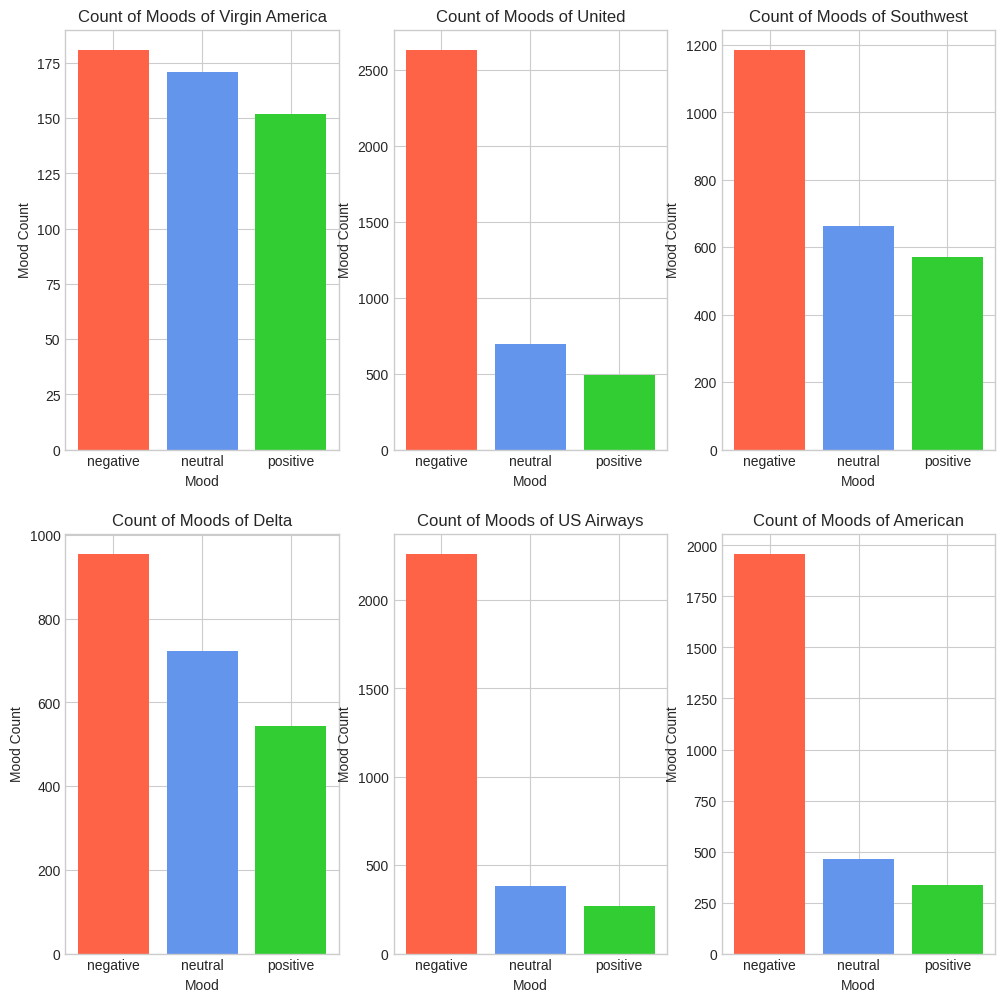

In [9]:
airlines= ['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways', 'American']
plt.figure(1,figsize=(12, 12))

for i in airlines:
    indices= airlines.index(i)
    plt.subplot(2,3,indices+1)
    new_df=df[df['airline']==i]
    count=new_df['airline_sentiment'].value_counts()
    Index = [1,2,3]
    plt.bar(Index,count, color=['tomato', 'cornflowerblue', 'limegreen'])
    plt.xticks(Index,['negative','neutral','positive'])
    plt.ylabel('Mood Count')
    plt.xlabel('Mood')
    plt.title('Count of Moods of '+i)

## Visualize the reasons behind the negative sentiments

<Figure size 1800x1000 with 0 Axes>

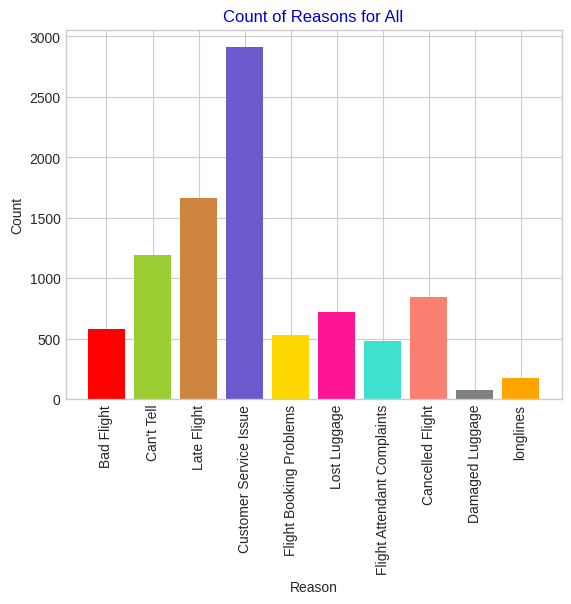

<Figure size 1800x1000 with 0 Axes>

In [10]:
df['negativereason'].nunique()
airlines= ['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways', 'American']

def get_negative_reasons_Count(airline):
    if airline=='All':
        a = df
    else:
        a = df[df['airline']==airline]

    count = dict(a['negativereason'].value_counts())

    df_unique_reason = list(df['negativereason'].unique())
    df_unique_reason = [x for x in df_unique_reason if str(x) != 'nan']

    df_reasons = pd.DataFrame({'Reasons': df_unique_reason})
    df_reasons['count'] = df_reasons['Reasons'].apply(lambda x: count[x])

    return df_reasons


def plot_reason(airline):

    a = get_negative_reasons_Count(airline)
    count=a['count']
    Index = range(1,(len(a)+1))

    plt.bar(Index,count, color=['red','yellowgreen','peru','slateblue','gold','deeppink','turquoise','salmon','grey','orange'])
    plt.xticks(Index,a['Reasons'],rotation=90)
    plt.ylabel('Count')
    plt.xlabel('Reason')
    plt.title('Count of Reasons for ' + airline, color = 'mediumblue')

plot_reason('All')
plt.figure(2,figsize=(18, 10))

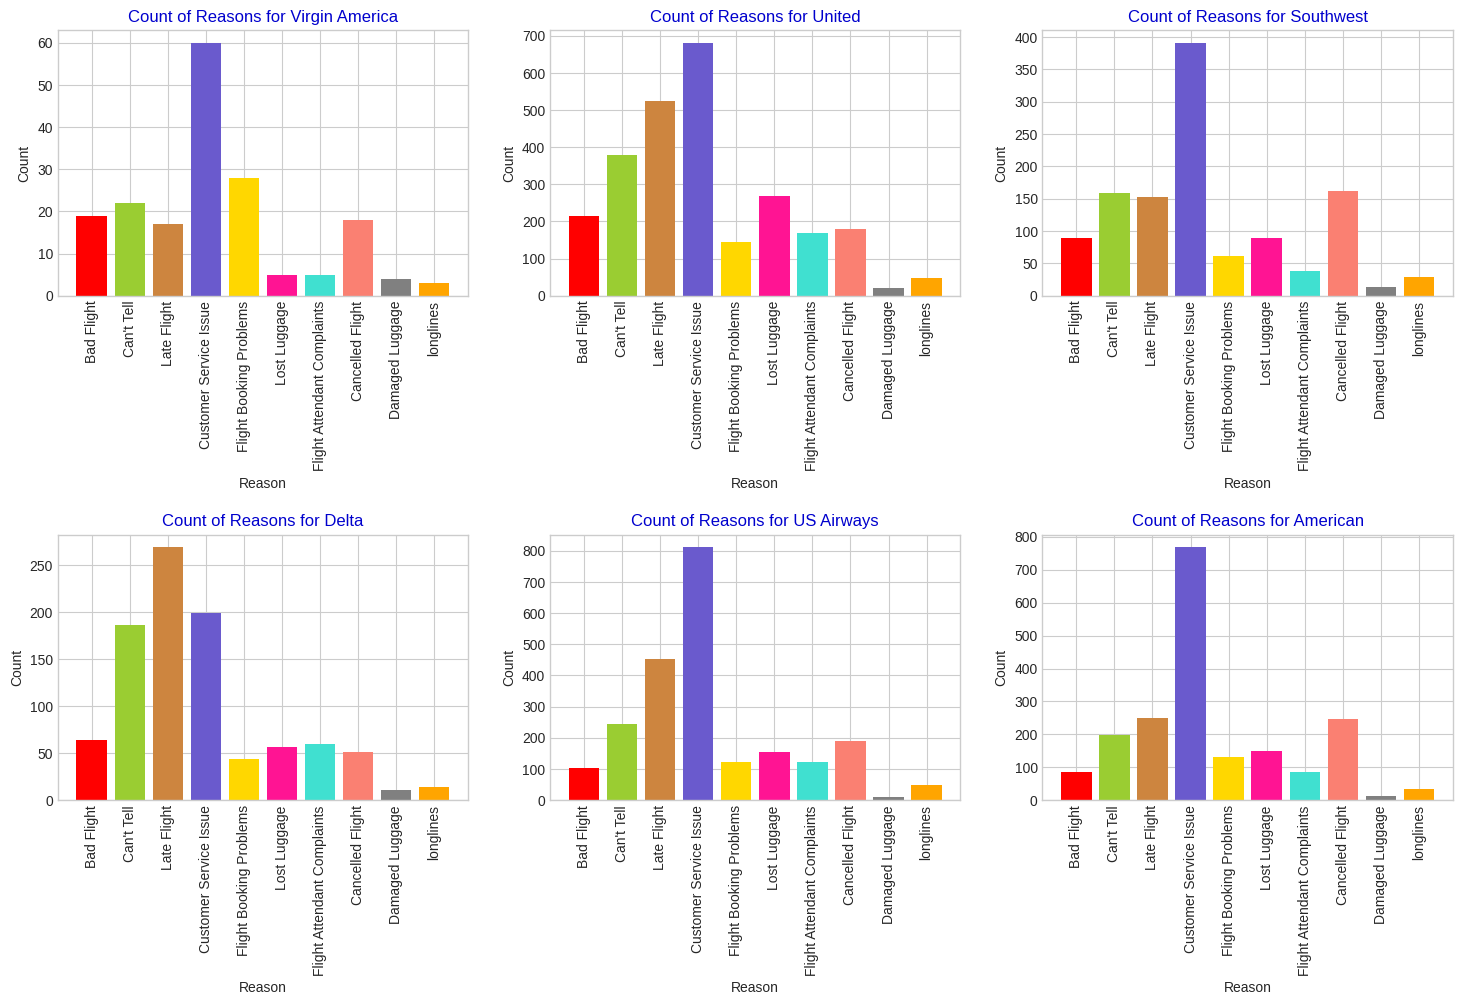

In [11]:
plt.figure(1,figsize=(18, 10))

for i in airlines:
    indices= airlines.index(i)
    plt.subplot(2,3,indices+1)
    plt.subplots_adjust(hspace=0.9)
    plot_reason(i)

### Insights

* Poor custom services is a significant driver behind negative sentiments

## Visualizing **negative** tweet text into wordclouds

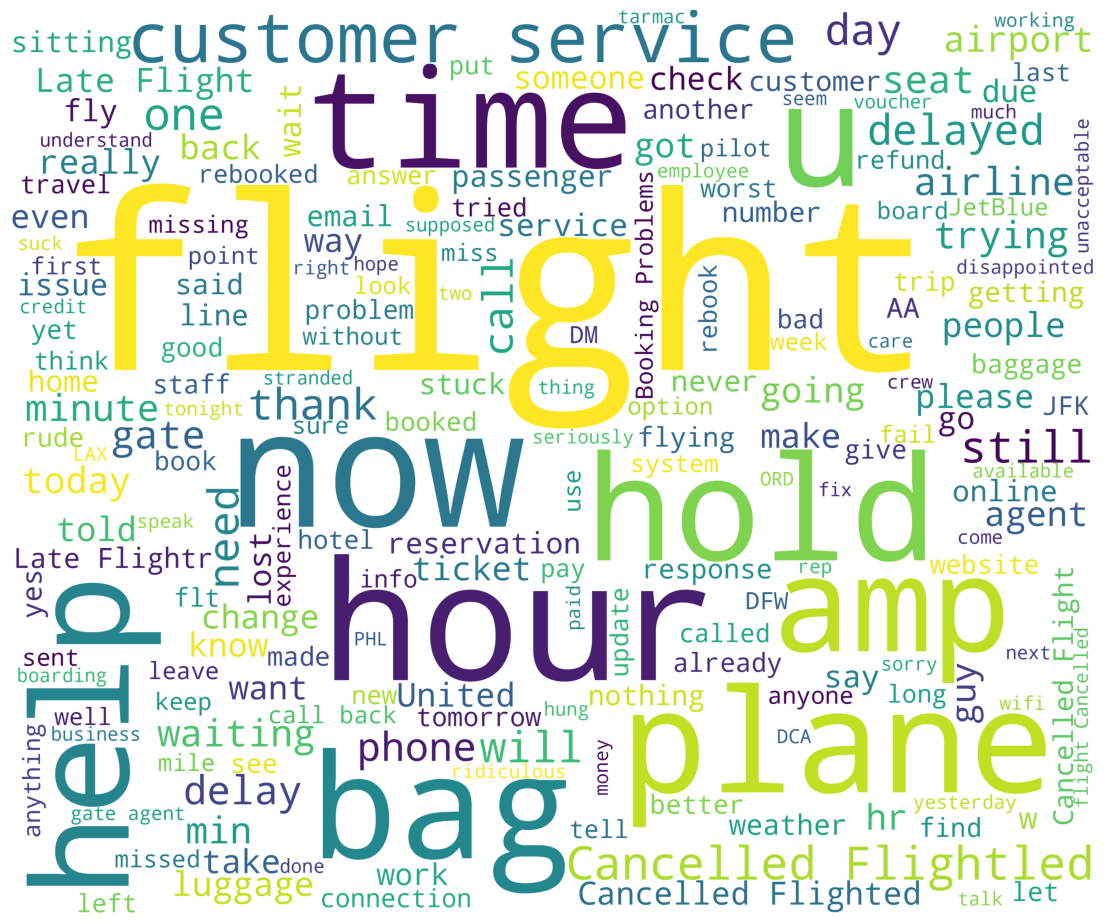

In [12]:
df_negative = df[df['airline_sentiment']=='negative']

words = ' '.join(df_negative['text'])

cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(
    stopwords=STOPWORDS,
    background_color='white',
    width=3000,
    height=2500
).generate(cleaned_word)

plt.figure(1,figsize=(14, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Visualizing **positive** tweet text into wordclouds

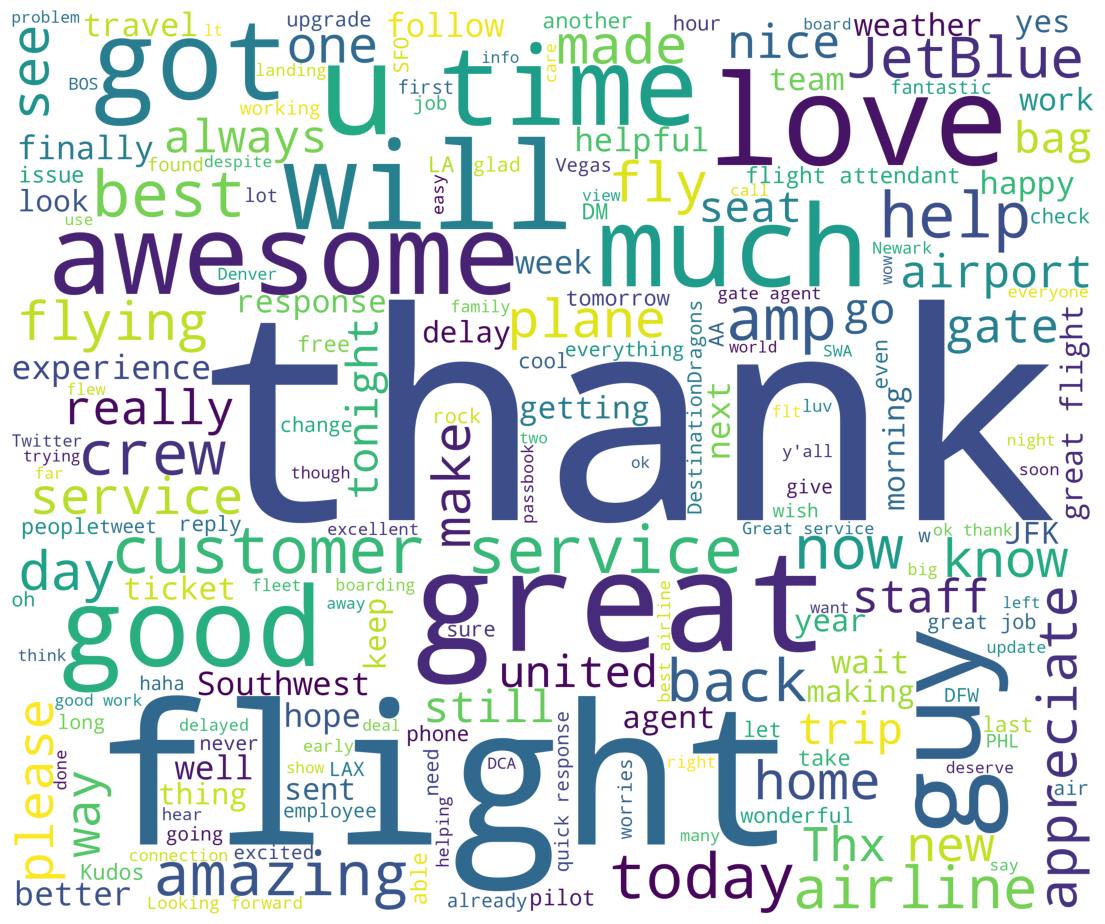

In [13]:
df_positive = df[df['airline_sentiment']=='positive']

words = ' '.join(df_positive['text'])

cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(
    stopwords=STOPWORDS,
    background_color='white',
    width=3000,
    height=2500
).generate(cleaned_word)

plt.figure(1,figsize=(14, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()